In [1]:
import os
import imageio
import matplotlib.pyplot as plt
import matplotlib as mpl
from skimage import feature, img_as_float
import numpy as np
import cv2
import time

In [2]:
files = list(sorted(os.listdir('../CBC/Testing/Images')))

In [3]:
len(files)

60

In [4]:
#funcion obtener globulos blancos
def GB(img):
    #image to image hsv
    img_hsv = mpl.colors.rgb_to_hsv(img)
    #normalize imageg
    img_h_n= cv2.normalize(img_hsv[:,:,1], None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    #hist_,_ = np.histogram(img_h_n, bins=256, range=(0,256))
    #plt.bar(np.arange(0,256), hist_)
    #threshold
    thresh = 150
    img_h_n[img_h_n<=thresh]= 0
    #plt.imshow(img_exp1,cmap='gray')
    
    img_h_n[img_h_n>thresh]= 255
    
    img_m = cv2.morphologyEx(img_h_n, cv2.MORPH_CLOSE, np.ones((10,10),np.uint8))
    
    img_GB = feature.canny(img_m, sigma=3)
    
    return img_GB

In [5]:
times = []
for file in files:
    img = imageio.imread(os.path.join('../CBC/Testing/Images', file))
    start = time.time() * 1000
    GB(img)
    end = time.time() * 1000
    times.append(end-start)

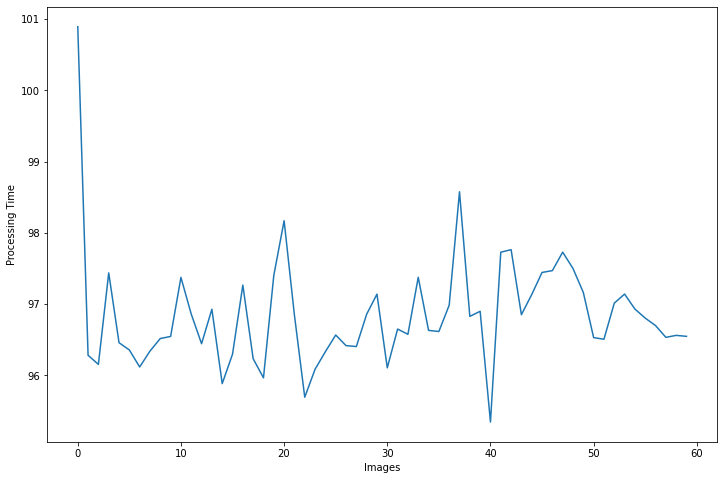

In [6]:
plt.figure(figsize=(12,8))
plt.xlabel('Images')
plt.ylabel('Processing Time')
plt.plot(times)

In [7]:
print('Total images: %d' % len(files))
print('Total time: %.4f seconds' % (np.sum(times) / 1000))
print('Average time: %.4f miliseconds' % np.average(times))

Total images: 60
Total time: 5.8108 seconds
Average time: 96.8473 miliseconds
